## Predict if an existing customer is more likely to buy a new car using Decision Tree Classifier

### Step 1: Import Neccessary Libraries

In [4]:
import warnings
warnings.filterwarnings("ignore")

In [5]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

### Step 2: Load the data

In [6]:
data = pd.read_csv(r'C:\Users\balas\OneDrive\Documents\ML_AT2\repurchase_dataset.csv')

In [7]:
# Descriptive Statistics
display(data.describe())

,ID,Target,age_of_vehicle_years,sched_serv_warr,non_sched_serv_warr,sched_serv_paid,non_sched_serv_paid,total_paid_services,total_services,mth_since_last_serv,annualised_mileage,num_dealers_visited,num_serv_dealer_purchased
count,131337.000000,131337.000000,131337.000000,131337.000000,131337.000000,131337.000000,131337.000000,131337.000000,131337.000000,131337.000000,131337.000000,131337.000000,131337.000000
mean,77097.384180,0.026809,5.493022,5.452500,5.472517,5.452287,5.497050,5.481692,5.454967,5.469807,5.502836,5.485438,5.480778
std,44501.636704,0.161525,2.843299,2.884328,2.870665,2.886528,2.878699,2.880408,2.875961,2.859756,2.854896,2.876772,2.867524
min,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,38563.000000,0.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000
50%,77132.000000,0.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000
75%,115668.000000,0.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000
max,154139.000000,1.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000


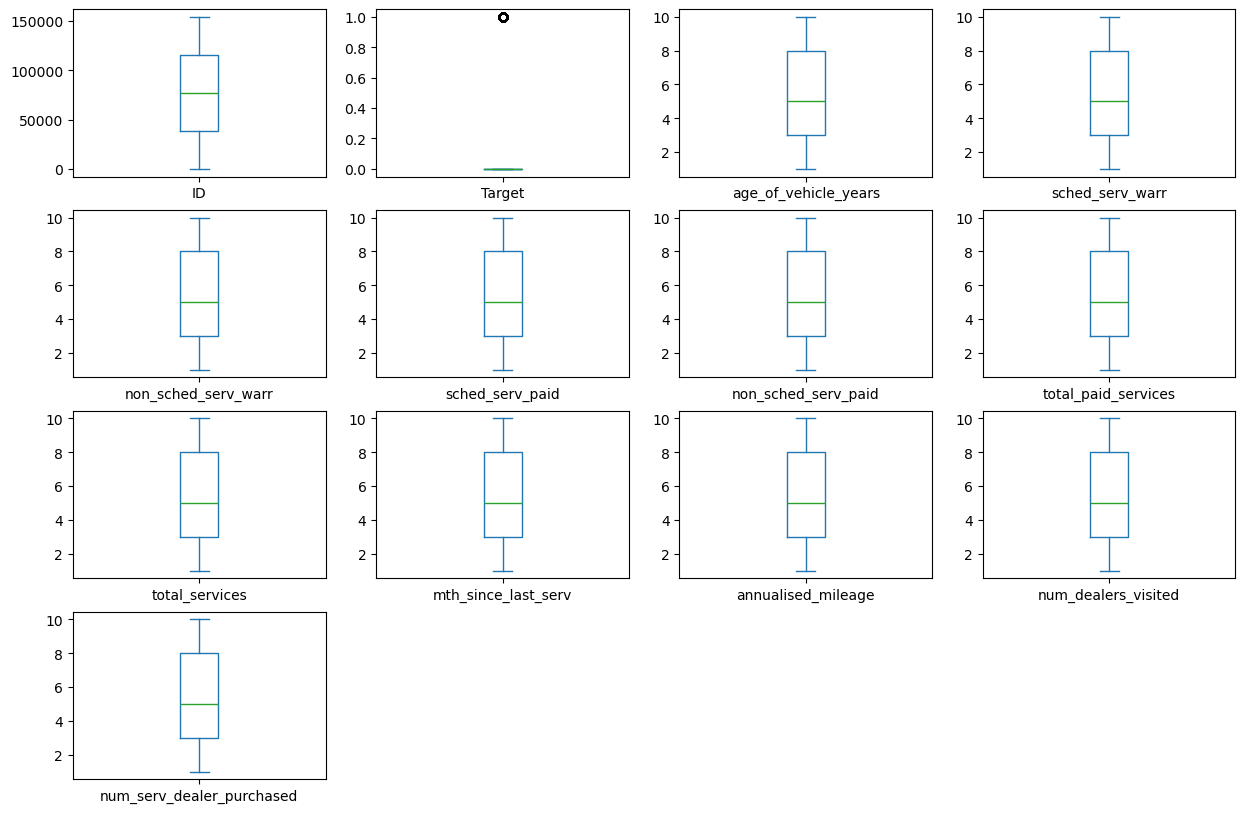

In [8]:
# Box plots for numerical features to check for outliers
num_features = data.select_dtypes(include=['int64', 'float64']).columns.tolist()
data[num_features].plot(kind='box', figsize=(15, 10), subplots=True, layout=(4, 4))
plt.show()

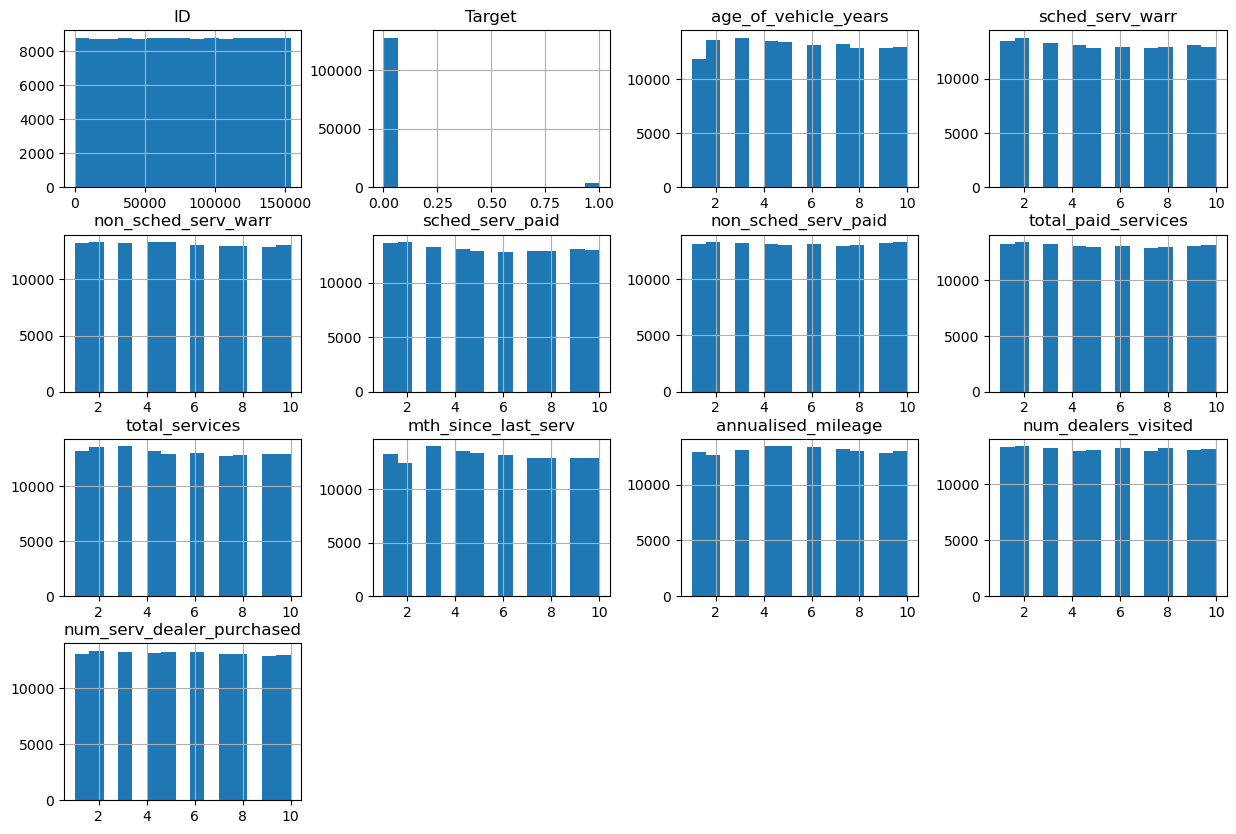

In [9]:
# Histograms for each numerical feature
data.hist(bins=15, figsize=(15, 10), layout=(4, 4))
plt.show()

In [10]:
# Drop the 'ID' column
data.drop('ID', axis=1, inplace=True)
data.drop('age_band', axis=1, inplace=True)

# Encode the 'gender' column
encoder = LabelEncoder()
data['gender'] = encoder.fit_transform(data['gender'].astype(str))

# One-hot encode the 'car_model' and 'car_segment' columns
data = pd.get_dummies(data, columns=['car_model', 'car_segment'])

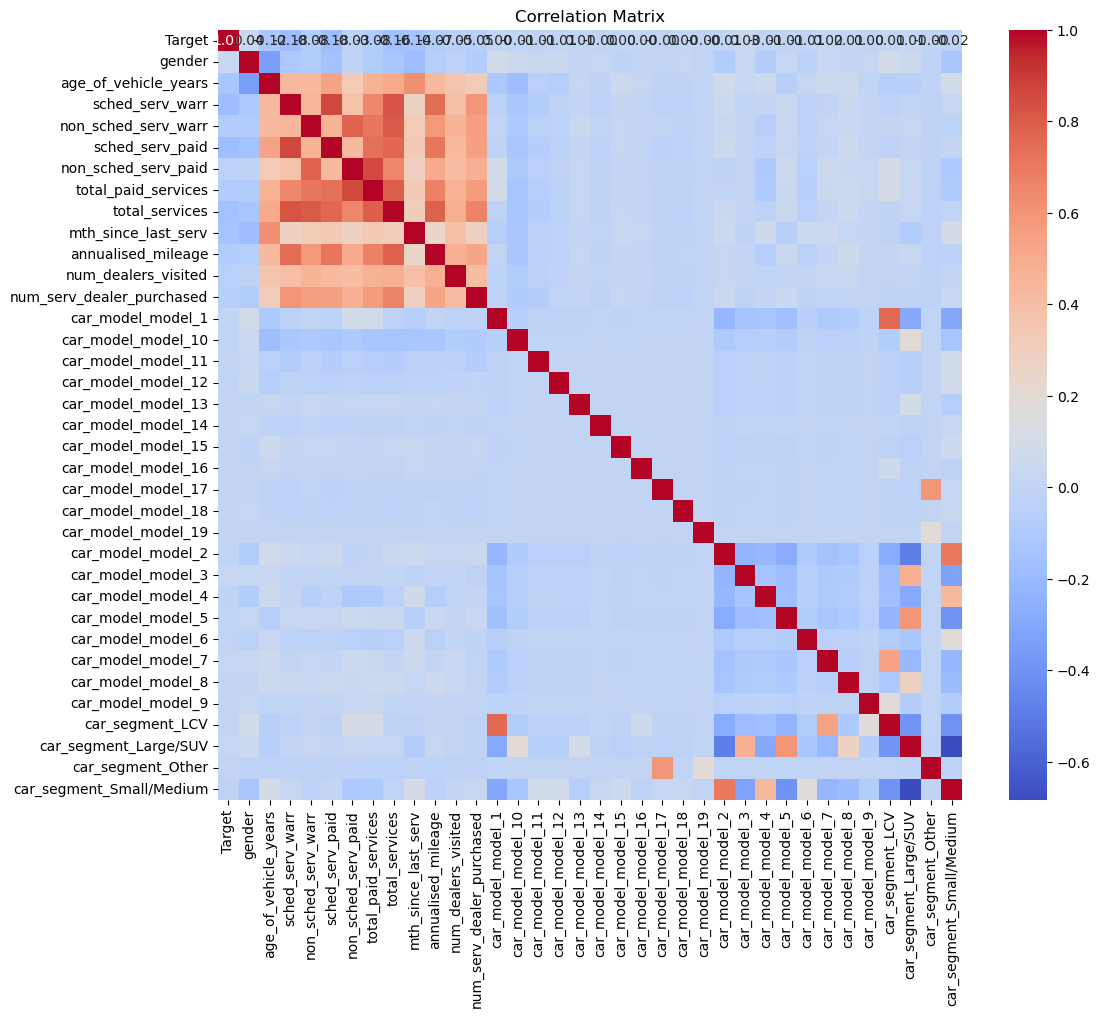

In [11]:
# Correlation Matrix
plt.figure(figsize=(12, 10))
sns.heatmap(data.corr(), annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

### Step 3: Process the data

In [12]:
data

,Target,gender,age_of_vehicle_years,sched_serv_warr,non_sched_serv_warr,sched_serv_paid,non_sched_serv_paid,total_paid_services,total_services,mth_since_last_serv,...,car_model_model_4,car_model_model_5,car_model_model_6,car_model_model_7,car_model_model_8,car_model_model_9,car_segment_LCV,car_segment_Large/SUV,car_segment_Other,car_segment_Small/Medium
0,0,1,9,2,10,3,7,5,6,9,...,False,False,False,False,False,False,True,False,False,False
1,0,2,6,10,3,10,4,9,10,6,...,False,False,False,False,False,False,False,False,False,True
2,0,1,9,10,9,10,9,10,10,7,...,False,False,False,False,False,False,False,True,False,False
3,0,2,5,8,5,8,4,5,6,4,...,False,False,False,False,False,False,False,True,False,False
4,0,0,8,9,4,10,7,9,8,5,...,False,False,False,False,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
131332,1,2,7,10,10,9,10,10,10,3,...,False,False,False,False,False,False,False,True,False,False
131333,1,2,4,10,10,10,10,10,10,2,...,False,False,False,False,False,False,False,True,False,False
131334,1,2,4,4,9,5,4,3,8,4,...,False,True,False,False,False,False,False,True,False,False
131335,1,2,2,1,10,1,10,9,8,3,...,False,True,False,False,False,False,False,True,False,False


### Step 4: Split the data into train and test sets

In [13]:
X = data.drop('Target', axis=1)
y = data['Target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [14]:
X_train

,gender,age_of_vehicle_years,sched_serv_warr,non_sched_serv_warr,sched_serv_paid,non_sched_serv_paid,total_paid_services,total_services,mth_since_last_serv,annualised_mileage,...,car_model_model_4,car_model_model_5,car_model_model_6,car_model_model_7,car_model_model_8,car_model_model_9,car_segment_LCV,car_segment_Large/SUV,car_segment_Other,car_segment_Small/Medium
76012,2,5,8,3,6,5,5,6,7,3,...,False,False,False,False,False,False,False,True,False,False
48072,2,5,9,5,6,3,4,7,7,3,...,False,False,False,False,False,False,False,True,False,False
17713,2,4,6,10,3,10,9,10,6,7,...,False,False,False,False,False,False,True,False,False,False
116540,2,6,7,3,5,2,3,4,7,8,...,False,False,False,False,False,False,True,False,False,False
71027,2,2,2,4,2,4,2,3,3,5,...,False,False,False,False,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54886,2,4,6,3,6,1,3,4,4,3,...,False,False,False,False,True,False,False,True,False,False
110268,1,6,10,8,10,10,10,9,3,10,...,False,False,False,False,False,False,False,False,False,True
119879,2,10,8,4,10,4,9,6,10,6,...,False,False,False,False,False,False,False,False,False,True
103694,2,6,8,8,10,8,9,7,3,7,...,False,True,False,False,False,False,False,True,False,False


In [15]:
y_train

76012     0
48072     0
17713     0
116540    0
71027     0
         ..
54886     0
110268    0
119879    0
103694    0
121958    0
Name: Target, Length: 105069, dtype: int64

### Step 5: Train the model

In [16]:
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

### Step 6: Evaluate the model

In [17]:
y_pred_dt = dt_model.predict(X_test)
print('Accuracy:', accuracy_score(y_test, y_pred_dt))
print('Precision:', precision_score(y_test, y_pred_dt))
print('Recall:', recall_score(y_test, y_pred_dt))
print('F1-score:', f1_score(y_test, y_pred_dt))
print('ROC AUC score:', roc_auc_score(y_test, dt_model.predict_proba(X_test)[:,1]))

Accuracy: 0.988883813004416
Precision: 0.7591549295774648
Recall: 0.8166666666666667
F1-score: 0.7868613138686132
ROC AUC score: 0.9049945329584504


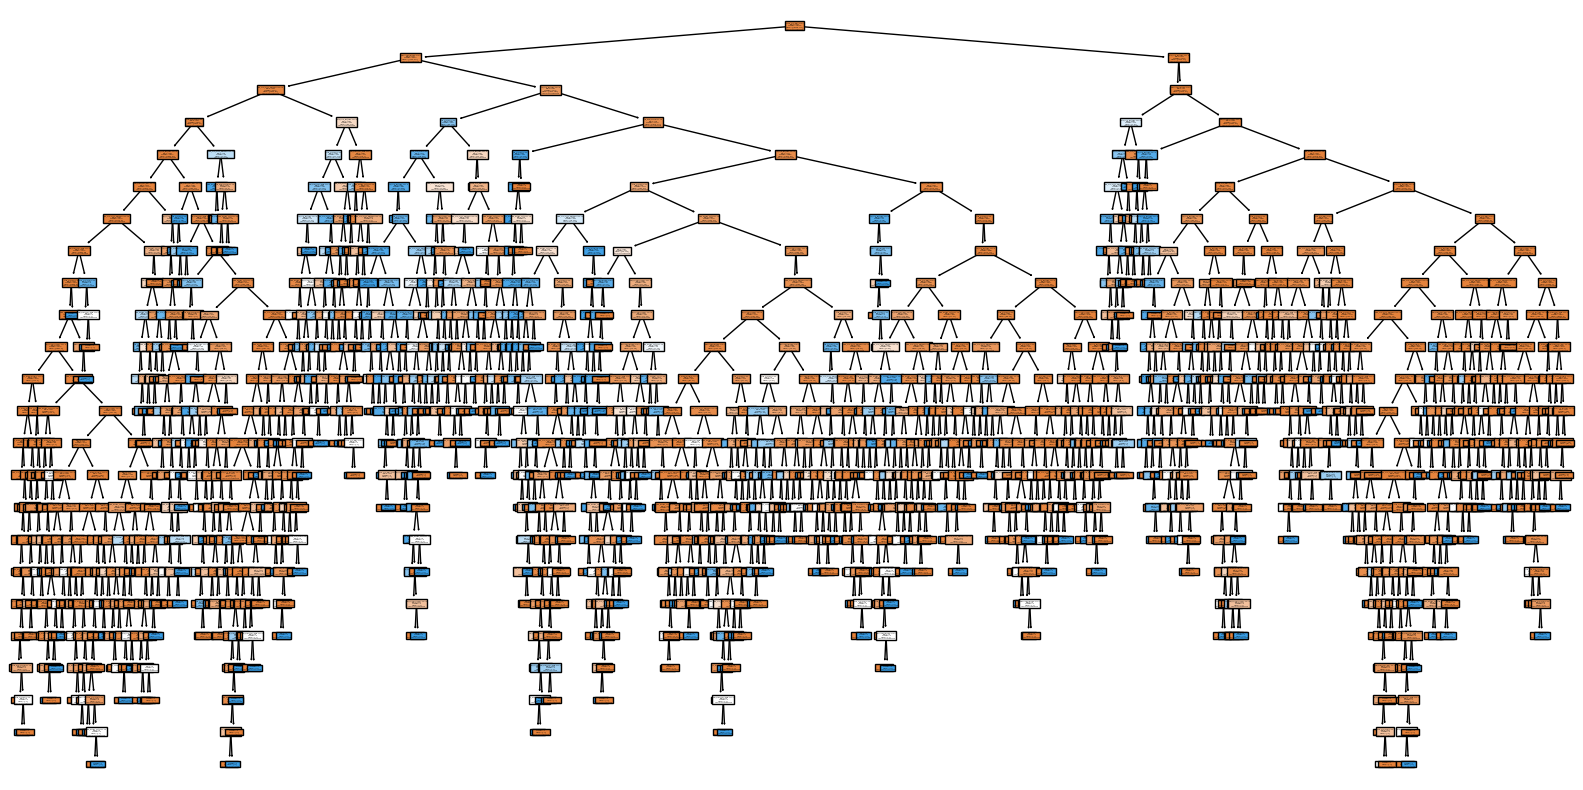

In [18]:
from sklearn.tree import plot_tree
plt.figure(figsize=(20,10))
plot_tree(dt_model, filled=True, feature_names=X.columns, class_names=['Not Repurchase', 'Repurchase'])
plt.show()

### Step 7: tuning the Hyperparameter grid to search

In [19]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier

# Define the parameter grid for DecisionTreeClassifier
param_grid = {
    'max_depth': [None, 5],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

# Setup GridSearchCV with fewer folds
dt = DecisionTreeClassifier(random_state=42)
grid_search = GridSearchCV(estimator=dt, param_grid=param_grid, cv=3, scoring='accuracy', verbose=1, n_jobs=-1)

# Fit GridSearchCV to the training data
grid_search.fit(X_train, y_train)

# Print the best parameters and the best score
print('Best parameters:', grid_search.best_params_)
print('Best cross-validation score: {:.2f}'.format(grid_search.best_score_))

Fitting 3 folds for each of 8 candidates, totalling 24 fits
Best parameters: {'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 2}
Best cross-validation score: 0.99


In [20]:
# Predict on the test data using the best parameters
y_pred = grid_search.best_estimator_.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1-Score:", f1_score(y_test, y_pred))

Accuracy: 0.9899497487437185
Precision: 0.8193548387096774
Recall: 0.7696969696969697
F1-Score: 0.7937500000000001


In [21]:
from sklearn.metrics import confusion_matrix, classification_report

# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred)
print('Confusion Matrix:')
print(cm)

# Calculate classification report
print('\nClassification Report:')
print(classification_report(y_test, y_pred))

Confusion Matrix:
[[25496   112]
 [  152   508]]

Classification Report:
              precision    recall  f1-score   support

           0       0.99      1.00      0.99     25608
           1       0.82      0.77      0.79       660

    accuracy                           0.99     26268
   macro avg       0.91      0.88      0.89     26268
weighted avg       0.99      0.99      0.99     26268



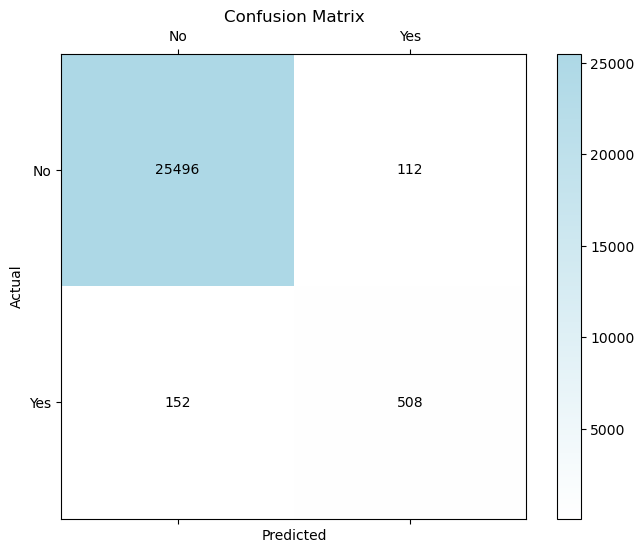

In [23]:
from sklearn.metrics import confusion_matrix
import matplotlib.colors as mcolors
import matplotlib.pyplot as plt
import numpy as np

# Define the light blue color
light_blue = mcolors.LinearSegmentedColormap.from_list("", ["#ffffff", "#add8e6"])

# Assuming y_test are the true labels and y_pred_svm are the predictions from your SVM model
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))  # Adjust the size as necessary
plt.matshow(cm, cmap=light_blue, fignum=1)
plt.colorbar()
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')

# Set the tick marks for "Yes" and "No"
plt.xticks([0, 1], ['No', 'Yes'])
plt.yticks([0, 1], ['No', 'Yes'])

# Add the text with values inside the squares
for (i, j), val in np.ndenumerate(cm):
    plt.text(j, i, f'{val}', ha='center', va='center')

plt.show()

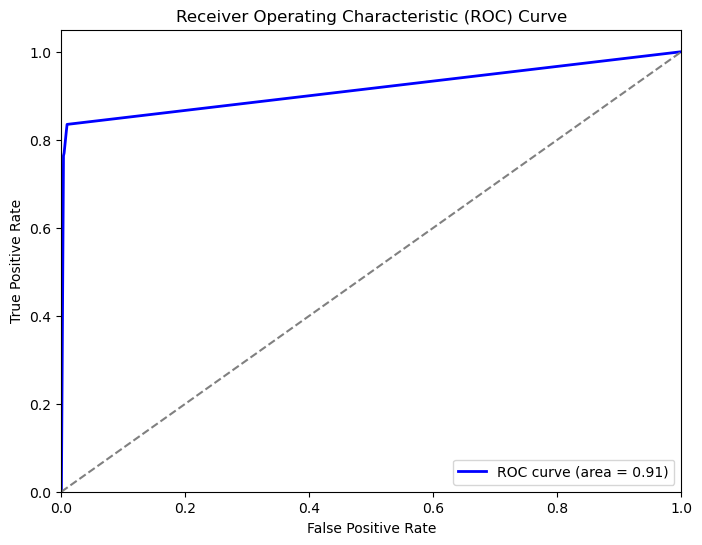

In [24]:
from sklearn.metrics import roc_curve, roc_auc_score

# Calculate the probabilities of the positive class
y_probs = grid_search.best_estimator_.predict_proba(X_test)[:, 1]

# Calculate the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_probs)

# Calculate the area under the ROC curve
roc_auc = roc_auc_score(y_test, y_probs)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()


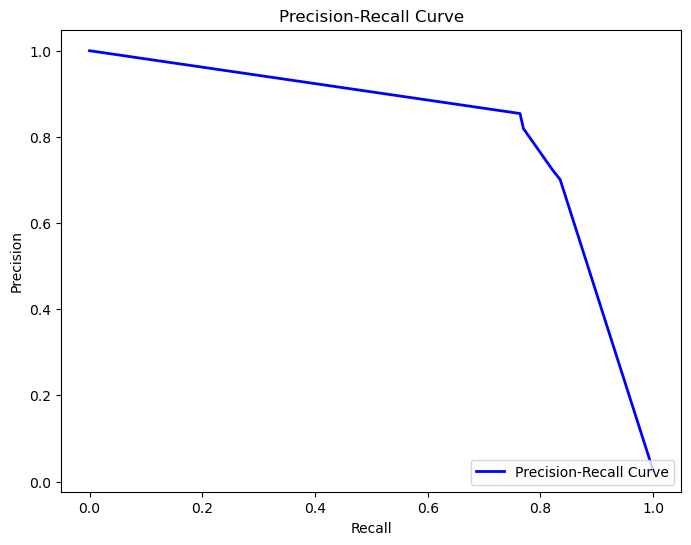

In [25]:
from sklearn.metrics import precision_recall_curve

# Calculate the probabilities of the positive class
y_probs = grid_search.best_estimator_.predict_proba(X_test)[:, 1]

# Calculate precision and recall
precision, recall, thresholds = precision_recall_curve(y_test, y_probs)

# Plot Precision-Recall curve
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, color='blue', lw=2, label='Precision-Recall Curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc="lower right")
plt.show()


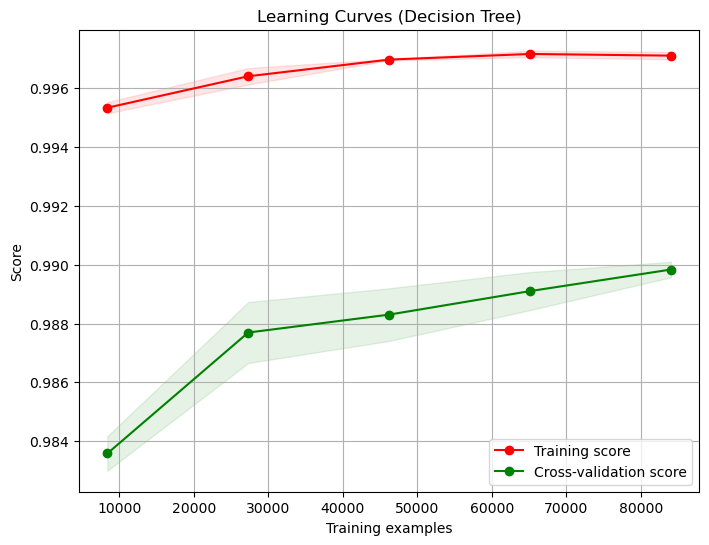

In [23]:
from sklearn.model_selection import learning_curve

# Define a function to plot learning curves
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5)):
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.figure(figsize=(8, 6))
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    plt.grid()
    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")
    plt.legend(loc="best")
    return plt

# Plot learning curves
plot_learning_curve(grid_search.best_estimator_, "Learning Curves (Decision Tree)", X_train, y_train, cv=5, n_jobs=-1)
plt.show()
